### Importing the required libraries

In [82]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import utils
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKeras
import tensorflow as tf

### Downloaded the FER dataset from the kaggle competition "Challenges in representation learning facial expression recognition challenge"

The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

In [45]:
!kaggle competitions download -c  challenges-in-representation-learning-facial-expression-recognition-challenge


challenges-in-representation-learning-facial-expression-recognition-challenge.zip: Skipping, found more recently modified local copy (use --force to force download)


In [46]:
import numpy as np
import cv2
import mxnet as mx
import pandas as pd
import random
import os

curdir = os.path.abspath(os.path.dirname("__file__"))

def gen_record(csvfile,channel):
    data = pd.read_csv(csvfile,delimiter=',',dtype='a')
    labels = np.array(data['emotion'],np.float)
    # print(labels,'\n',data['emotion'])
        
    imagebuffer = np.array(data['pixels'])
    images = np.array([np.fromstring(image,np.uint8,sep=' ') for image in imagebuffer])
    del imagebuffer
    num_shape = int(np.sqrt(images.shape[-1]))
    images.shape = (images.shape[0],num_shape,num_shape)
    # img=images[0];cv2.imshow('test',img);cv2.waitKey(0);cv2.destroyAllWindow();exit()
    dirs = set(data['Usage'])
    subdirs = set(labels)
    class_dir = {}
    for dr in dirs:
        dest = os.path.join(curdir,dr)
        class_dir[dr] = dest
        if not os.path.exists(dest):
            os.mkdir(dest)
            
    data = zip(labels,images,data['Usage'])
    
    for d in data:
        destdir = os.path.join(class_dir[d[-1]],str(int(d[0])))
        if not os.path.exists(destdir):
            os.mkdir(destdir)
        img = d[1]
        filepath = unique_name(destdir,d[-1])
        print('[^_^] Write image to %s' % filepath)
        if not filepath:
            continue
        sig = cv2.imwrite(filepath,img)
        if not sig:
            print('Error')
            exit(-1)


def unique_name(pardir,prefix,suffix='jpg'):
    filename = '{0}_{1}.{2}'.format(prefix,random.randint(1,10**8),suffix)
    filepath = os.path.join(pardir,filename)
    if not os.path.exists(filepath):
        return filepath
    unique_name(pardir,prefix,suffix)
    
    
if __name__ == '__main__':
    filename = 'Dataset/fer2013.csv'
    filename = os.path.join(curdir,filename)
    gen_record(filename,1)

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_1259813.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_72278215.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_81222865.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_83628503.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_7012230.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_42504119.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_91386926.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_9743996.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_11418209.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_80254755.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_45869391.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_46965203.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_45657463.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_14484799.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_84187655.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_85432066.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_4436420.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_79796311.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_28237580.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_26879463.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_71040415.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_3322452.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_94537545.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_5735420.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_37864366.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_69743102.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_481078.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_71683088.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_92859423.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_80852082.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_95176272.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_56940021.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_3570383.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_68465846.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_7069615.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_6897107.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_76629181.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_8236767.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_21135521.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_5001416.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\T

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_12830815.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_28227289.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_19112681.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_80946187.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_20323115.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_19954432.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_37874787.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_97578586.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_29276921.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_83674013.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_55533736.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_71096669.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_27307570.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_36225617.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_18303990.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_10311841.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_22553181.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_30745669.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_97073620.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_69876612.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_43327546.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_96163041.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_80629138.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_39987127.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_94436012.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_58665730.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_94622551.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_11330096.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_63722824.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_76653917.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_26030193.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_30458935.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_11714633.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_45510372.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_74306283.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_95379623.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_15700394.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_49675910.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_39670847.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_41988405.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_82695324.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_82702666.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_65458349.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_55873633.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_26779898.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_17303435.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_81662154.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_92837640.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_13295955.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_93444217.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_62395297.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_12830857.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_37892795.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_32639968.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_10766596.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_35355386.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_33053603.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_17069478.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_53836134.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_84770283.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_1757819.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_98159877.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_39889753.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_28106559.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_89410543.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_5591664.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_75839556.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_57768358.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_83630841.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_77125379.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_56995475.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_21884303.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_18473855.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_75462724.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_64316074.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_36266204.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_35960859.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_91351066.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_29413786.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_91919467.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_55279925.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_81265159.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_36659962.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_44968940.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_48375163.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_16815157.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_64357985.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_22880661.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_72001639.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_29603904.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_89718641.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_1384626.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_72667111.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_36467713.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_23577376.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_72619779.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_5928888.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_73195927.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_81334939.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_24568756.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_85812600.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_20529306.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_78736329.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_28238238.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_12440947.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_46453666.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_81093881.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_99599860.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_68326913.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_68461056.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_82039623.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_42530404.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_27280151.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_75912130.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_27267807.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_12179537.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_3334383.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_78463325.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_41224265.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_14422067.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_82870812.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_48812571.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_43337391.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_20007050.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_40446443.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_54503997.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_61453998.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_47918465.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61113510.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_39821257.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_51614323.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_36711807.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_53091973.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_95039485.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_34335105.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_29597093.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_29597517.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_86877375.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_64728066.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_67422728.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_92117249.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_1254153.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_38927259.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_14307979.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_10640567.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_39569457.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_34687934.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_12710065.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_34551595.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_72854323.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_44776718.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_57540202.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_33036020.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_7326704.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_44651280.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_78031462.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_78869589.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_34600290.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_39109334.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_12376437.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_49664540.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_4545327.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_25898700.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_32431550.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_61169075.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_76054307.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_55608356.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_15281774.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_51114754.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_65687174.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_66032232.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_85530184.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_68429306.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_29112132.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_56554695.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_83144749.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_73186529.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_72068329.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_77679608.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_7128361.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_39946304.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_69592691.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_42151950.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_93032202.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_79359141.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_23876880.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_68160804.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_55221516.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_94849387.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_50022260.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_91714343.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_82372589.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_77943341.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_85907295.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_90196166.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_587953.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_43089540.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_43889874.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_31703047.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_10057008.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_81357522.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_74606965.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_58953065.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_92280071.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_89457014.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_44668529.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_68136660.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_86872014.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_79515020.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_20641273.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_48334793.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_66983229.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_77468573.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_6012503.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_35055757.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_3805513.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_86494088.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_14634356.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_14568536.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_65841674.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_17420842.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_47400808.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_64532026.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_13798129.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_28982969.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_56690485.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_21626328.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_90494466.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_45606216.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_65087403.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_43016746.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_23898978.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_67850498.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_958144.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_94992414.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_59204692.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_29171611.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_33007531.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_48071528.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_25044895.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_49236387.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_95689235.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_5974861.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_27746775.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_70414331.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_50718379.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_92455049.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_23337411.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_65801497.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_60294710.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_25939237.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_27087711.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_47704211.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_53642814.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_43952359.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_80219083.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_84747987.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_44072957.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_76766705.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_40391858.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_25358183.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61828070.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_27314407.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_71729896.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_83095071.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_9185514.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_84537227.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_32711694.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_72041012.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_6276636.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_3999064.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_5244416.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_4302713.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_11323384.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_37097643.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_6407234.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_66210216.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_43263101.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_57988866.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_3887165.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_84945579.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_42079629.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_80753469.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_45978597.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_93936438.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_36882899.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61262776.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_98197463.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_38915074.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_20582004.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_36240684.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_73437760.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_19568719.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_72994161.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_7335041.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_4811369.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_88382818.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_59630921.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_86151734.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_66802995.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_7606019.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_15654529.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_77758760.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_55653921.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_79864541.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_47159586.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_19410044.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_52320451.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_54857364.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_48767212.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_13066262.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_15524120.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_58488169.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_36272837.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_1118153.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_53064994.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_6070414.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_78718601.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_25386975.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_8695133.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_7132140.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_33083317.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_3088610.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_42863455.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_36360101.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_44377808.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_54654682.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_79905818.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_13935813.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_65755305.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_33660138.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61896065.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_1179157.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_4934291.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61985108.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_49282009.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_31805025.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_17856361.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_88414944.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_86326669.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_31393390.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_75175139.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_21850549.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_8081622.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_34015387.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_41466674.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_82656874.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_39380721.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_58574360.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_45873084.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_2580742.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_2770780.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_47788801.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_2843536.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_33825385.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_36390469.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_46321630.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_50383842.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_29774337.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_67922499.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_13311541.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_96321413.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_72063805.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_72158563.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_40805987.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_65467608.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_66083298.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_42020750.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_32150777.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_21781415.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_29544299.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_62911329.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_76928330.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_81947741.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_23256152.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_97570461.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_19995416.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_65399383.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_81838301.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_23768852.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_79757083.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_38311246.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_13499618.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_26400518.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_8233549.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_51704750.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_57254059.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_14032443.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_70324423.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_94100879.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_11942461.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_51731773.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_55110850.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_18197833.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_70118255.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_26649426.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_36887206.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_2818996.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_12412015.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_73610689.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_36270305.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_85804243.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_13213502.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_76556588.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_10597708.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_63430230.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_27023502.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_21360601.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_1334081.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_64625800.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_81102823.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_81869304.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_84701724.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_52640877.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_10645276.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_76354945.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_81735694.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_40640808.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_53232097.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_54125869.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_7478430.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_80507459.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_99720123.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_20152915.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_36213872.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_19998522.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_71277924.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_63244864.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_19283906.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_32805583.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_31424303.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61849562.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_50832181.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_28787388.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_40346092.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_30149571.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_95728885.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_7818563.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_14208900.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_95742728.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_30820264.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_2086448.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_60352370.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_36360425.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_16471951.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_75665999.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_86096568.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_87109216.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_60410078.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_74334130.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_58004913.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_26163590.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_76228360.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_91541567.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_25176365.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_17084192.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_29952837.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_99464604.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_8043682.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_77914856.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_58828038.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_85695934.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_64335353.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_31189490.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_87586332.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61138300.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_3441095.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_47083094.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_14349430.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_88680844.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_92350922.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_95752169.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_42349203.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_55730385.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_12076547.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_40783035.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_68737883.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_40948427.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_72010216.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_71697703.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_83872035.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_94548463.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_21941820.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_43583967.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_35661945.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_51734298.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_16082994.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_15186094.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_93335351.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_76271225.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_96360100.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_42121316.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_46536726.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_18151166.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_44902037.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_57275803.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_78704680.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_38627430.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_64186883.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_39594694.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_62653890.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_47081007.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_17735983.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_16299837.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_5803178.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_13507237.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_39348684.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_28202669.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_18746967.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_20346193.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_78458366.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_77137212.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_15743354.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_64724119.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_70650329.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_58344886.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_832261.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_55905419.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_99014228.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_38935851.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_96404607.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_51449905.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_67525524.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_63430123.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_30310136.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_86401268.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_15788940.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_76023879.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_60358043.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_86226842.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_18975658.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_37183129.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_94650687.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_26000381.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_16067328.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_8767673.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_48418975.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_18218547.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_19608378.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_36726452.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_70222545.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_94033119.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_56206203.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_25662219.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_51785798.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_65603704.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_78835423.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_84386661.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_38736898.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_23716068.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_57662634.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_69917037.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_45631906.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_47905000.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_26351363.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_93955334.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_72179533.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_36910188.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_99131113.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_98584711.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_84366623.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_53437242.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_19323487.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_86650152.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_2012584.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_71937286.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_21420861.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_89602391.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_94488158.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_55881877.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_9891473.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_21807664.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_14371560.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_91752835.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_48333091.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_86098077.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_7891055.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_69392732.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_78628644.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_85171019.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_17654380.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_7891499.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_54878573.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_86094208.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_65225843.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_67612575.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_65775750.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_88471761.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_30394460.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_33760760.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_95974368.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_82204376.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_82097443.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_92812989.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_13226209.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_351688.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_17235383.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_47575247.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_56978670.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_27493744.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_31615780.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_82421702.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_66879738.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_91401987.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_67571498.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_12214716.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_51466495.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_80257837.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_30905612.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_42200350.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_49324536.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61860032.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_44749539.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_5267352.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_6001436.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_79662978.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_54159011.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_321278.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_24544587.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_40371808.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_45114621.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_24779429.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_45802628.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_69376741.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_63997912.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_33959421.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_1327682.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_39402125.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_93073020.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_45641326.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_20934370.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_38399568.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_85683489.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_4360780.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_10942030.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_90082211.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_89319964.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_16256376.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_93695998.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_6328772.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_97141593.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_51466396.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_4204910.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_39774812.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_93758433.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_99260092.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_53059881.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_93994220.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_40729571.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_53975440.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_88541000.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_17508138.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_19845892.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_69765807.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_17030161.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_50999471.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_22791478.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_8047400.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_93850054.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_79372775.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_97848811.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_42441884.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_41530826.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_44618234.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_38512648.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_77322642.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_96302562.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_10866604.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_99195119.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_37744389.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_41626050.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_50518248.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_44223987.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_75310504.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_98112783.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_30566336.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_97224468.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_91754087.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_43899024.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_48494144.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_69711914.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_38868786.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_19954256.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_11340581.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_68312973.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_57634205.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_43648510.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_5311196.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_69012835.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_8638857.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_25837557.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_42016395.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_96292944.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_95468860.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_17142357.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_80495628.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_77925034.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_96932688.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_48292143.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_55957460.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_63253110.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_11421525.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_40021219.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_12786927.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_38265183.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_33060694.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_90654998.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_93858597.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_44712344.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_90540618.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_86224147.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_98220580.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_4960671.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_37182524.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_21584251.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_20193528.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_89316453.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_2838859.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_58095908.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_93759230.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_48432335.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_87287301.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_39329089.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_34355688.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_91126872.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_40547058.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_62818331.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_57862479.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_42306606.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_86505533.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_36379500.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_58210376.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_8086350.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_20562146.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_56745485.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_74684266.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_28764548.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_96642388.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_6526843.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_45070231.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_7161975.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_12341574.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_53027565.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_8560220.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_96253265.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_42710975.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_34319988.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_96045699.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_56046094.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_23509604.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_38777972.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_25021148.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_4236339.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_52221150.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_55539106.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_26824288.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_46937565.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_17187024.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_76476229.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_60053962.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_26306627.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_68297663.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_92802621.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_66350976.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_82050090.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_32017538.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_97882506.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_26410589.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_64706528.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_18528237.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_64056164.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_44839547.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_82273949.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_61943654.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_99059172.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_54709485.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_91716614.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_20983106.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_61056672.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_17698092.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_21205091.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_92280353.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_29583974.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_65650937.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_23918259.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_84236556.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_30274678.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_56943317.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_7854617.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_27848249.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_72064480.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_32953924.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_72071248.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_45285910.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_21929889.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_83020869.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_92220071.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_30375081.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_19543895.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_66207643.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_30027470.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_13636746.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_79628341.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_93302408.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_77029370.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_60965809.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_32700146.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_70783667.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_7785912.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_8601183.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_37643424.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_80016226.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_13613533.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_79419865.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_93204042.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_28554045.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_59698141.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_71932357.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_31008551.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_18609082.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_25491954.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_92057376.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_88281551.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_21152655.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_27178211.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_94119403.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_53788377.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_20308670.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_19688105.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_66765710.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_32660192.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_22483394.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_39112842.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_86411188.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_92844641.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_49612864.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_79757205.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_54641374.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_14668374.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_89959323.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_50117612.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_50217908.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_55590819.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_257161.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_35654306.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_83400865.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_8850100.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_33905367.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_75554810.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_92986023.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_60077900.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_36358440.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_75151934.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_23505.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_5808735.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_37088133.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_54572664.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_50160232.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_41424050.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_98952146.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_96023845.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_34780385.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_53126732.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_50966607.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_57649831.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_41588864.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_11789479.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_38201619.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_39489516.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_52996439.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_83519223.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_81294608.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_33506187.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_15605943.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_9040861.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_60010757.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_93301771.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_92693227.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_12850191.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_78669893.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_50967555.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_4081884.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_63112960.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_99399790.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_94931221.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_79697266.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_84818130.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_17983324.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_99315862.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_95934660.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_45355841.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_7310544.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61503896.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_66004502.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_56657578.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_12102163.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_56931907.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_86202989.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_7423097.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_18456619.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_8892120.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_27424138.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_69223008.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_9091084.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_80014074.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_17344409.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_85582537.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_8450931.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_47277301.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_41431919.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_59169401.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_48423387.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_93642721.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_22309518.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_69153391.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_99869997.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_97056126.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_43959503.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_6707482.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_20385388.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_88857836.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_63190885.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_43217920.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_43612603.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_44534998.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_17220214.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_17100959.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_13614824.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_51666181.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_93832844.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_60168476.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_3238612.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_31919173.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_49670126.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_45248938.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_35044682.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_86873819.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_51463766.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_61073538.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_48892502.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_61102119.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_71965773.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_64176332.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_4870006.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_90598109.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_52432681.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_19369090.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_24970730.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_77177805.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_67933572.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_84661993.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_46182049.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_72635654.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_5648804.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_94622764.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_80158382.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_25007327.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_76052378.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_25868806.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_89515553.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_6636781.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_51690050.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_73105652.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_31313359.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_20409428.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_50624383.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_92428800.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_64806808.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_50100206.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_95277910.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_72589246.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_47988333.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_31139683.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_85369182.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_51872946.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_97113115.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_18009610.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_30616130.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_33032788.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_93384323.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_81780653.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_53861597.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_13454977.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_50367051.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_21655563.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_58567426.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_92023711.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_77528457.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_73734415.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_74076602.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_1254320.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_53852226.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_82089326.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_17319400.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_98598837.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_75687708.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_43268099.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_9213600.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_77774352.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_20817326.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_45362808.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_75343300.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_35913871.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_82439895.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_56093166.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_96167377.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_53112410.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_20772839.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_6451808.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_30840432.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_84316301.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_93742389.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_67331658.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_10419804.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_28979074.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_94271989.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_20047025.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_535773.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_22565691.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_83698827.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_51255007.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_66090469.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_25845248.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_60170137.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_83204557.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_82149303.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_56761617.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_83387166.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_27126136.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_26467280.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_22222816.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_60027522.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_26078334.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_77715667.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_65898778.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_79154724.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_43927115.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_80822107.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_96112762.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_83421538.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_72728082.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_94139938.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_57439706.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_14786167.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_7446283.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_95110711.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_59249106.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_93966576.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_66217958.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_55761155.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_8955564.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_51605368.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_89287909.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_13619918.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_63456197.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_26115790.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_24065848.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_83899977.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_99048384.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_61755770.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_9572324.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_18159333.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_62977069.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_37272748.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_21743838.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_97594492.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_17104071.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_29000250.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_33961959.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_73154653.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_5813354.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_42818310.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_76813329.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_29242658.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_13722619.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_53164679.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_20674974.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_73037492.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_39941175.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_4429292.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_7356388.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_75210791.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_60845109.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_53989968.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_77013712.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_57389405.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_47441683.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_16878108.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_32470610.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_19828914.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_64114558.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_34419718.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_98607952.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_85009768.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_65389300.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_29544140.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_89923057.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_14907844.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_95247006.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_14285306.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_73907446.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_50335650.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_33016175.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_89772151.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_70266951.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_24548190.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_15158571.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_16119976.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_3357949.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_9983003.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_12078662.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_81818927.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_19148305.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_53625897.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_47124453.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_29391809.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_25626792.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_90361288.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_98566683.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_43693529.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_23262490.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_76502122.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_60648953.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_44777526.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_14892798.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_49008302.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_75553953.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_73230561.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_703386.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_95634431.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_69703510.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_13235298.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_54090447.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_58043315.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_31140832.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_89930139.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_33218634.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_46463736.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_48947329.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_44795956.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_95740352.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_19578120.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_44042976.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_47463753.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_69591719.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_40954065.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_56556994.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_77532399.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_87980388.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_46950417.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_56355205.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_86471798.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_96304654.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_12667185.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_11206735.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_56066044.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_8212550.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_88062171.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_81444993.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_90205880.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_18344604.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_14164579.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_62431347.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_76981912.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_82874086.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_68558007.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_6825711.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_68549178.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_52877237.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_3823344.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_33060841.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_93911130.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_65467854.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_18624677.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_42143329.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_52208446.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_88956745.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_11816436.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_41385304.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_67643196.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_88233658.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_69406517.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_1534108.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_15769383.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_37279723.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_20478896.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_94420868.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_66068139.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_42803658.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_95531137.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_76189218.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_1698285.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_31654604.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_47723373.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_5787088.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_51375247.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_57659911.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_63451794.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_94462539.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_68040758.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_46838050.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_57966307.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_54294879.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_28971731.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_29472072.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_31248918.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_21312817.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_51051306.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_16168032.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_70102278.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_60910433.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_87925781.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_91672524.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_35370257.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_23968343.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_12440441.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_67172978.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_63146767.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_87110487.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_75934020.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_15262211.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_11299700.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_5089067.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_82813659.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_77036303.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_27490517.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_68538097.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_2393142.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_12774332.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_52690954.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_44756429.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_47128907.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_57957081.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_98920054.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_23685806.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_99543859.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_15889190.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_88015286.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_66757794.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_23789048.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_18068772.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_21343498.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_54722660.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_75501482.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_55591066.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_19787283.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_97211378.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_18616465.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_37489708.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_10956414.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_33712608.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_70659503.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_50133077.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_50329193.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_59064188.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_99975993.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_35495957.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_92755091.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_93783092.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_59598036.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_37539410.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_4059001.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_55754131.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_83253681.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_35199538.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_95406039.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_83105091.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_96566173.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_93742895.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_96633553.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_96106157.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_99608310.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_774641.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_72135558.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_5237059.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_79097305.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_57446628.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_84101641.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_11672877.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_8395610.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_42398829.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_47228302.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_84780450.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_44358073.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_26327494.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_26476905.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_8767598.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_53468594.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_63597671.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_86358640.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_66180144.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_66328279.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_3168714.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_14637189.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_18305451.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_62345296.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_51164212.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_20979656.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_73967279.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_42697385.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_68897622.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_92216486.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_62602748.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_7339063.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_53815359.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_55728993.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_42659934.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_20805289.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_39441511.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_14220434.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_62535441.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_85159854.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_43754614.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_10191015.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_38406173.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_60335483.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_10667919.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_3495748.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_16878086.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_65917661.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_62518025.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_47377556.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_90918918.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_27250163.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_57054882.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_35213947.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_81695326.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_23477989.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_23881009.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_52771582.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_17086913.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_63070034.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_85217154.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_70939161.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_90335126.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_16281525.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_88249261.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_46703369.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_33602345.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_39479382.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_57520851.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_11721524.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_88247290.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_26139719.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_67169568.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_73097345.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_16459753.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_47719779.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_25790519.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_99244644.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_8238746.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_15165270.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_80215060.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_90433758.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_95810695.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_41364205.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_86789998.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_42027786.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_45356375.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_34914456.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_65837825.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_75896943.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_2810831.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_51272069.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_65569579.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_4950240.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_54840129.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_31018746.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_1576846.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_43553063.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_36314927.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_98026430.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_23625239.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_25125622.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_62042642.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_918463.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_3707396.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_26842748.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_76960091.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_82629910.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_35031037.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_91125652.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_48691524.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_2382563.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_97310669.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_39966384.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_75891759.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_83560196.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_98876803.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_61168542.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_37223471.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_92807350.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_34570280.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_8392150.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_27032682.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_34093129.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_53176381.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_94112313.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_66971135.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_41929750.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_94064534.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_28219963.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_38392866.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_19165660.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_70167675.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_72706975.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_38780331.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_89345338.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_59026116.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_80647221.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_33082325.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_36378008.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_50527240.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_46451261.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_81617831.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_269682.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_12150807.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_50925393.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_92818273.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_43720828.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_65991126.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_86701515.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_49963400.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_87379341.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_42760488.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_74637179.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_7182596.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_55684122.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_75291785.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_90192429.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_26157868.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\1\Training_14827061.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_13870210.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_24630044.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_18757295.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_25603280.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_54953425.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_85942257.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_62931664.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_21670447.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_55476942.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_79233130.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_48468594.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_43550680.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_36146583.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_89085640.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_35875395.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_21776434.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_11539369.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_49949512.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_47185945.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_83873140.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_67978947.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_26316403.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_60864835.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_31329884.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_22227647.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_45860587.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_77234654.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_37879462.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_75435918.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_18132075.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_85603441.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_66251179.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_11729450.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_58795573.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_79656746.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_14658657.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_92671432.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_78025235.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_84472664.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_15971242.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_63794775.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_34466505.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_58464060.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_3912739.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_97425557.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_18413351.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_55913967.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_39650316.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_51660160.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_19588865.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_88599529.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_86691378.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_35278301.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_11759552.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_68874610.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_34091114.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_97977594.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_77520025.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_91665828.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_51755292.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_32642563.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_99026274.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_28281366.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_72087321.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_16113962.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_44375128.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_22264814.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_93889489.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_30734949.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_94083020.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_74393102.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_60655549.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_77972047.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_89282421.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_90084941.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_87962275.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_21064282.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_98246164.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_29430994.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_32590729.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_50941054.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_23596729.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_65692866.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_52936537.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_42453669.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_26491426.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\5\Training_78711672.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_66761092.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Trainin

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\4\Training_52495842.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_84846799.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\6\Training_68729616.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\0\Training_36160766.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\3\Training_4717471.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_75751886.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_26622968.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training\2\Training_69045495.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\Training

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_19736910.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_28236587.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_77138475.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_63579979.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_99228289.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_98977769.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_63504665.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_56209233.jpg
[^_^] Write image to C:\Users\arane\Facial expression re

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_84996163.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_47725963.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_86730202.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_33709545.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_76054509.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_33380220.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_11860530.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_6914717.jpg
[^_^] Write image to C:\Users\arane\Facial expression rec

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_94723371.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_94385249.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_38995526.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_5420074.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_7311636.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_4134497.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_92684876.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_65585783.jpg
[^_^] Write image to C:\Users\arane\Facial expression recog

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_16388190.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_43421684.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_7787765.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_95324722.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_91837809.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_1729630.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_75831408.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_89314104.jpg
[^_^] Write image to C:\Users\arane\Facial expression reco

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_17753799.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_33258220.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_69152951.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_5183100.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_32003124.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_40018102.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_1639885.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_93793594.jpg
[^_^] Write image to C:\Users\arane\Facial expression reco

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_1574075.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_53682941.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_19295275.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_85533885.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_34789976.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_4037034.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_15453278.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_33044975.jpg
[^_^] Write image to C:\Users\arane\Facial expression reco

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_53312756.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_45807716.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_2248954.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_16039090.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_16764266.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_30964986.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_34024627.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_8521456.jpg
[^_^] Write image to C:\Users\arane\Facial expression reco

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_61867045.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_66995887.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_67561913.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_12406442.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_55286355.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_97452549.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_2347933.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_71462739.jpg
[^_^] Write image to C:\Users\arane\Facial expression rec

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_80225902.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_84437980.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_46963568.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_73449985.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_49159048.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_37186904.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_43697832.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_1900877.jpg
[^_^] Write image to C:\Users\arane\Facial expression rec

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_76432108.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_3740084.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_33476504.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_5035445.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_35099667.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_59686763.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_68277341.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_88805410.jpg
[^_^] Write image to C:\Users\arane\Facial expression reco

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_30105157.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_85413700.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_50769098.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_86672436.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_25548698.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_92886798.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_9907090.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_41043873.jpg
[^_^] Write image to C:\Users\arane\Facial expression rec

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_6264463.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_33877873.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\1\PublicTest_77753695.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_61667019.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_26314185.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_35861611.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_974393.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_17562327.jpg
[^_^] Write image to C:\Users\arane\Facial expression recog

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_60224791.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_36150167.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_41431153.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_41486768.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_18482245.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_10019628.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_22116103.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_15178527.jpg
[^_^] Write image to C:\Users\arane\Facial expression re

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_23238543.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_40784339.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_66922235.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_61719881.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_98998373.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_60058692.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_93619288.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_60216006.jpg
[^_^] Write image to C:\Users\arane\Facial expression re

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_6591756.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_26254501.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_11089455.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_30474602.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_9535717.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_47528349.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_37336869.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\1\PublicTest_15184108.jpg
[^_^] Write image to C:\Users\arane\Facial expression reco

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_47026748.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_83750274.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_81730820.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_71425345.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_62765704.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_94045567.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_69338693.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_85111107.jpg
[^_^] Write image to C:\Users\arane\Facial expression re

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_76529981.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_70004028.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\1\PublicTest_70432299.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_92417374.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_48246156.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_56030904.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_8306006.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_74290022.jpg
[^_^] Write image to C:\Users\arane\Facial expression rec

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_11816004.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_95815733.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_40599639.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_70372508.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_66852270.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_81161674.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_78698515.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_95278285.jpg
[^_^] Write image to C:\Users\arane\Facial expression re

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_18749686.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_70657565.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_6303801.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_44578793.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_97263472.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_1896545.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_40911125.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_37506402.jpg
[^_^] Write image to C:\Users\arane\Facial expression reco

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_71554686.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_49031575.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_61572697.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_46113351.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_65591875.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_53138027.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_7907425.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_43686552.jpg
[^_^] Write image to C:\Users\arane\Facial expression rec

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_63352661.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_54248640.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_63753084.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_11298371.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_64430036.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_48731695.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_28781962.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_28038248.jpg
[^_^] Write image to C:\Users\arane\Facial expression re

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_75333383.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_39823469.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_91373625.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_71488120.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_67367015.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_63924180.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_44879022.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_91445150.jpg
[^_^] Write image to C:\Users\arane\Facial expression re

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_49403259.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_15931476.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_94822599.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_5314764.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_70769056.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_46642652.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_49033152.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_50826824.jpg
[^_^] Write image to C:\Users\arane\Facial expression rec

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_45532442.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_72975851.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_485939.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_60556388.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_17538932.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_21494925.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_49107764.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\0\PublicTest_70992132.jpg
[^_^] Write image to C:\Users\arane\Facial expression reco

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_642130.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_47094380.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_38425196.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_78702696.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_40245011.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\2\PublicTest_63962079.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_3463907.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_87193003.jpg
[^_^] Write image to C:\Users\arane\Facial expression recog

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_75393048.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_43576982.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_88190367.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_28940086.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_79691505.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\5\PublicTest_59160254.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_1873458.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_63037936.jpg
[^_^] Write image to C:\Users\arane\Facial expression rec

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_10466113.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_15487862.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_78423413.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\3\PublicTest_1674142.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_8110654.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\4\PublicTest_46505450.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_24852704.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PublicTest\6\PublicTest_5075482.jpg
[^_^] Write image to C:\Users\arane\Facial expression recog

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_62568088.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_24239407.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_86549867.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_83144746.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_38647927.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_96260450.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_62662547.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_28232980.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_19091014.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_6745180.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_54731939.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_84507028.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_76585928.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_51071395.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_67170569.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_52099347.jpg
[^_^] Write image to C:\Users\arane\Facia

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\1\PrivateTest_70051312.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_31730554.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_93958688.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_35540535.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_57479138.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_75220445.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_91239457.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_36315582.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_6209925.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_56781242.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_17366451.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_23856842.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_97915632.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_50406939.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_33462708.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_19005924.jpg
[^_^] Write image to C:\Users\arane\Facia

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_87310289.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_32231250.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_21215528.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_80274741.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_1132851.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_94910787.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_24080506.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_69202893.jpg
[^_^] Write image to C:\Users\arane\Facia

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_68149652.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_93679750.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_62424622.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_89431283.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_94104978.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_23484348.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_67494244.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_49169612.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_57868511.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_24117987.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_30739814.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_55943370.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_72799304.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_69728533.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_14741446.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_53374071.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_24427478.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_24448778.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_84886113.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_79725994.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_78199088.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_13985477.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_3834226.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_53750308.jpg
[^_^] Write image to C:\Users\arane\Facia

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_43709633.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_63273884.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_14462718.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_96238072.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_40210476.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_95471394.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_69564987.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_9044232.jpg
[^_^] Write image to C:\Users\arane\Facia

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_60670063.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_92757125.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_67247056.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_22400024.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_57072788.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_51081132.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_43972498.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_24427716.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_10311432.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_61624677.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_63234353.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_69115328.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_66462329.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_52799879.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_43194237.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_95257705.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_70713038.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_48092765.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_57669901.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_52201640.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_17845598.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_53849231.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_53598101.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_62481750.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_12042203.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_93459785.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_9167098.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_94263891.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_93632640.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_3350371.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_91091592.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_87709575.jpg
[^_^] Write image to C:\Users\arane\Facial

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_88940749.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_87222367.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_45253751.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_62304390.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_30694339.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_83386691.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_14474234.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_36324794.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_68113962.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_58970598.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_40323880.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_8867494.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_54200465.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_58721224.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_10789294.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_30378032.jpg
[^_^] Write image to C:\Users\arane\Facia

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_4225213.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_17764692.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_95387179.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_86804286.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_78833874.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_23405800.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_85346499.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_71473786.jpg
[^_^] Write image to C:\Users\arane\Facia

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_65743066.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_26723034.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_93007322.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_12012303.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_98935650.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_76245877.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_94739963.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_52787589.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_18861521.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_73595006.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_76643709.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_84968833.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_60476971.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_13538687.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_85281815.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\1\PrivateTest_76801872.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_23939701.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_38603339.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_80594563.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_33555782.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_55050936.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_29756827.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_45826941.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_54960257.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_13088000.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_71894132.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_58296428.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_90753019.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_93639409.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_37249096.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_85743188.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_93570342.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_5769301.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_91623531.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\1\PrivateTest_21869799.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_30722870.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_41589684.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_60432163.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_45946950.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_86612090.jpg
[^_^] Write image to C:\Users\arane\Facia

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_49881545.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_56224615.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_59476870.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_22247084.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_83138607.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_27799199.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_80847124.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_38637766.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_47226878.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_31945898.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_15336925.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_35302478.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_77469229.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_99170929.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\4\PrivateTest_15816817.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_54997759.jpg
[^_^] Write image to C:\Users\arane\Faci

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_15315986.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\5\PrivateTest_24385280.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_86720849.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_85797665.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_36378198.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\6\PrivateTest_43777247.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_17776561.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_970928.jpg
[^_^] Write image to C:\Users\arane\Facial

[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_16181117.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\0\PrivateTest_73551001.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\3\PrivateTest_18318903.jpg
[^_^] Write image to C:\Users\arane\Facial expression recognition using tf.keras\PrivateTest\2\PrivateTest_26987709.jpg


Plotting Images 

In [50]:
import os 
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def plot_images(plt):
    plt.figure(0,figsize=(12,20))
    ctr=0
    
    for expression in os.listdir("training/"):
        for i in range(1,6):
            ctr+=1
            plt.subplot(7,5,ctr)
            img=load_img("training/"+expression+"/"+os.listdir("training/"+expression)[i], target_size=(48,48))
            plt.imshow(img,cmap="gray")\
            
    plt.tight_layout()
    return plt


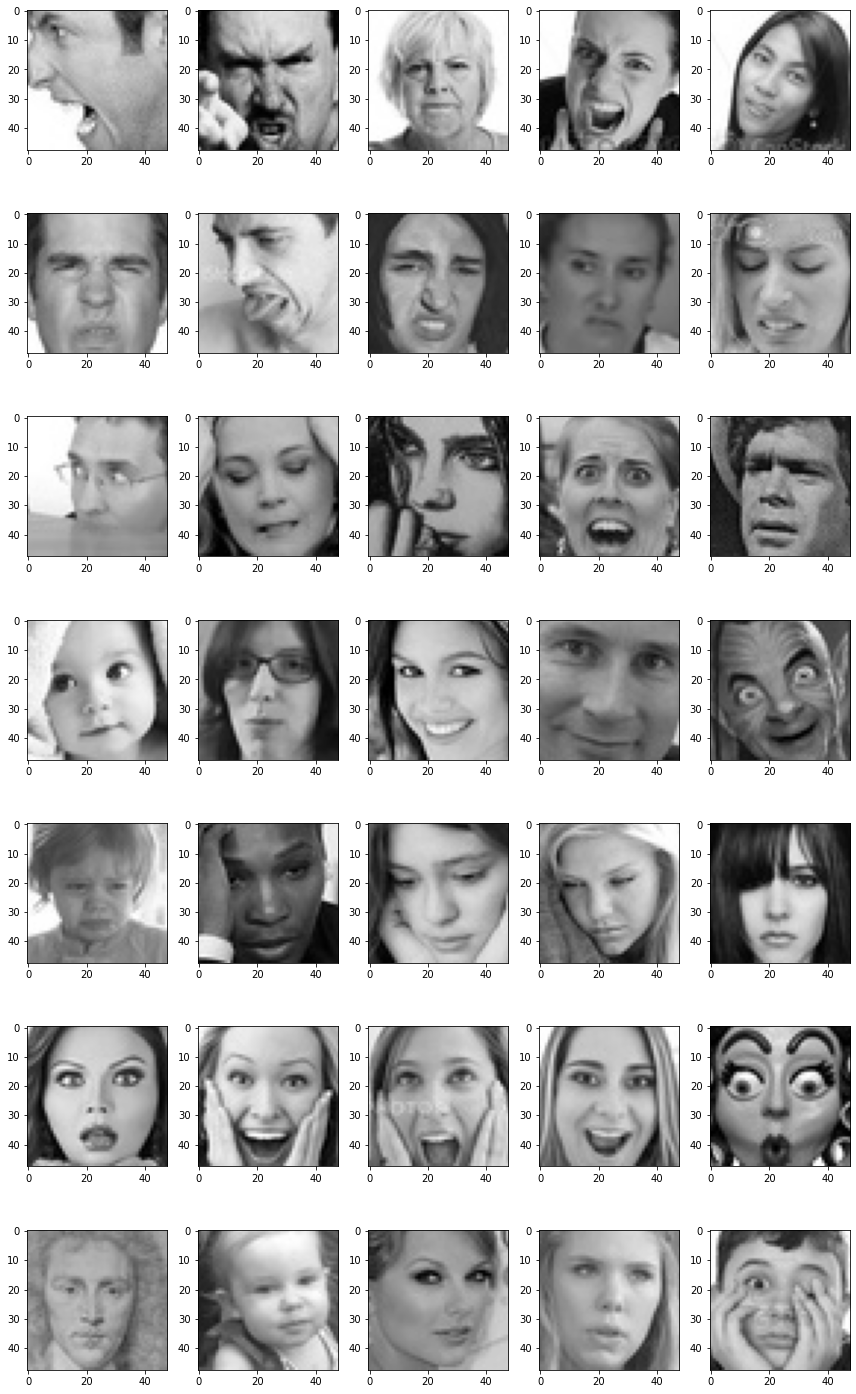

In [51]:
plot_images(plt).show()

In [62]:
for expression in os.listdir("Training/"):
    print(str(len(os.listdir("Training/"+ expression)))+" "+expression)

3994 0
436 1
4097 2
7215 3
4830 4
3171 5
4965 6


Generating Training and Testing batches as we are planning on use Batch Gradient descent for our algorithm to converge

In [ ]:
from distutils.dir_util import copy_tree

# copy subdirectory example
fromDirectory = "PrivateTest"
toDirectory = "PublicTest"

copy_tree(fromDirectory, toDirectory)

In [64]:
img_size = 48
batch_size = 80

datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("Training/",
                                                   target_size=(img_size,img_size),
                                                   color_mode ="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

Found 28708 images belonging to 7 classes.


In [77]:
datagen_test = ImageDataGenerator(horizontal_flip=True)
test_generator = datagen_test.flow_from_directory("PublicTest/",
                                                   target_size=(img_size,img_size),
                                                   color_mode ="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

Found 7178 images belonging to 7 classes.


In [72]:
datagen_test = ImageDataGenerator(horizontal_flip=True)
test_generator = datagen_test.flow_from_directory("PrivateTest/",
                                                   target_size=(img_size,img_size),
                                                   color_mode ="grayscale",
                                                   batch_size=batch_size,
                                                   class_mode="categorical",
                                                   shuffle=True)

Found 3589 images belonging to 7 classes.


['PublicTest\\0\\PrivateTest_10083967.jpg',
 'PublicTest\\0\\PrivateTest_10088578.jpg',
 'PublicTest\\0\\PrivateTest_10292636.jpg',
 'PublicTest\\0\\PrivateTest_10361516.jpg',
 'PublicTest\\0\\PrivateTest_10372837.jpg',
 'PublicTest\\0\\PrivateTest_11021567.jpg',
 'PublicTest\\0\\PrivateTest_11081138.jpg',
 'PublicTest\\0\\PrivateTest_11344812.jpg',
 'PublicTest\\0\\PrivateTest_1146250.jpg',
 'PublicTest\\0\\PrivateTest_11566376.jpg',
 'PublicTest\\0\\PrivateTest_11682740.jpg',
 'PublicTest\\0\\PrivateTest_12619930.jpg',
 'PublicTest\\0\\PrivateTest_12639663.jpg',
 'PublicTest\\0\\PrivateTest_1275470.jpg',
 'PublicTest\\0\\PrivateTest_12778863.jpg',
 'PublicTest\\0\\PrivateTest_12922089.jpg',
 'PublicTest\\0\\PrivateTest_13077950.jpg',
 'PublicTest\\0\\PrivateTest_13212324.jpg',
 'PublicTest\\0\\PrivateTest_13318628.jpg',
 'PublicTest\\0\\PrivateTest_13345563.jpg',
 'PublicTest\\0\\PrivateTest_13538741.jpg',
 'PublicTest\\0\\PrivateTest_13744226.jpg',
 'PublicTest\\0\\PrivateTest_14426

Designing the Convolutional Neural Network. Setttinh the parameters so that it training the model faster. We are going to use Conv nets as opposed to simple connected layers since they undoubdely work great with very few hyper parameters provided to them. 
So the input will be passed through 4 2D conv blocks, where we apply batch normalization, followed by RELU activation function, followed by Maxpooling and lastly dropout regularisation. We repeat this 4 times. We are downsampling the dimensions with maxpooling. After each block the dimension height and width or volume is downsized by a factor of 2 and the number of channels roughly doubles. 
After the 4 blocks we flatten the output after which we pass it to 2 fully connected dense layers for output we use softmax activation function to get the probabilities of the output as they are multiclass variables.

In [76]:
model = Sequential()

#1st conv block
model.add(Conv2D(64,(3,3),padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
          
#2nd conv block
model.add(Conv2D(128,(5,5),padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd conv block
model.add(Conv2D(512,(3,3),padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th conv block
model.add(Conv2D(512,(3,3),padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

opt=Adam(lr=0.0005)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

Training and evaluation the model 

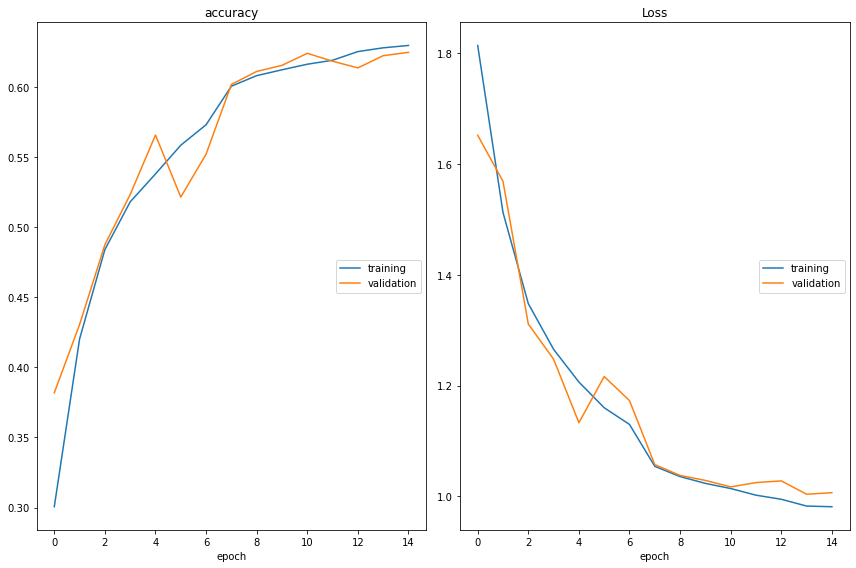

accuracy
	training         	 (min:    0.301, max:    0.630, cur:    0.630)
	validation       	 (min:    0.382, max:    0.625, cur:    0.625)
Loss
	training         	 (min:    0.982, max:    1.814, cur:    0.982)
	validation       	 (min:    1.004, max:    1.652, cur:    1.007)

Epoch 00015: saving model to model_weights.h5
358/358 [==============================] - 744s 2s/step - loss: 0.9815 - accuracy: 0.6296 - val_loss: 1.0069 - val_accuracy: 0.6247


In [85]:
epochs = 15
step_size_train = train_generator.n//train_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose= 1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor = 0.1, patience=2,min_lr =0.00001, model ='auto')

callbacks =[PlotLossesKeras(),checkpoint,reduce_lr]

history = model.fit(x=train_generator,
                    steps_per_epoch=step_size_train,
                    epochs=epochs,
                    validation_data=test_generator,
                    validation_steps=step_size_test,
                   callbacks=callbacks)

Saving the above model architecture to json.

In [86]:
model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)

Creating the flask app for predictions